In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# EDA

Viewing the Data

In [2]:
heart=pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
heart.shape

(918, 12)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


My observation:
<br>
So there is no null values
<br>
there are 12 Features

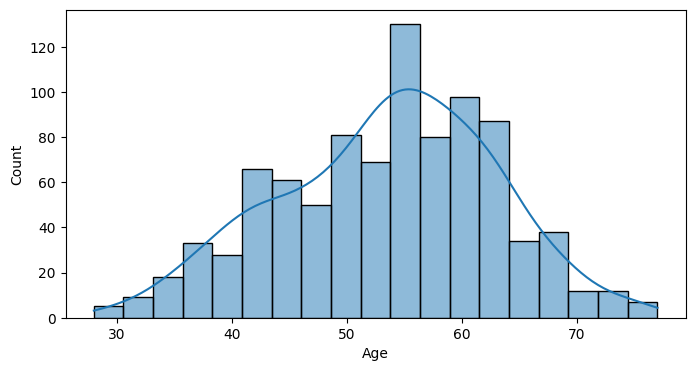

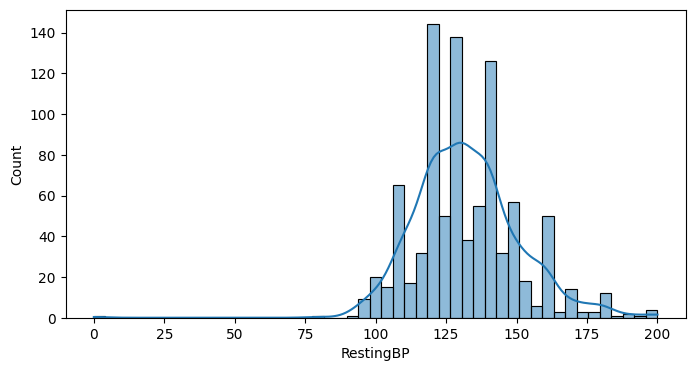

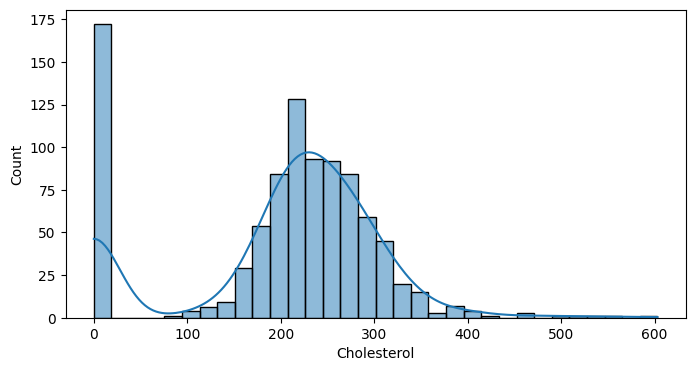

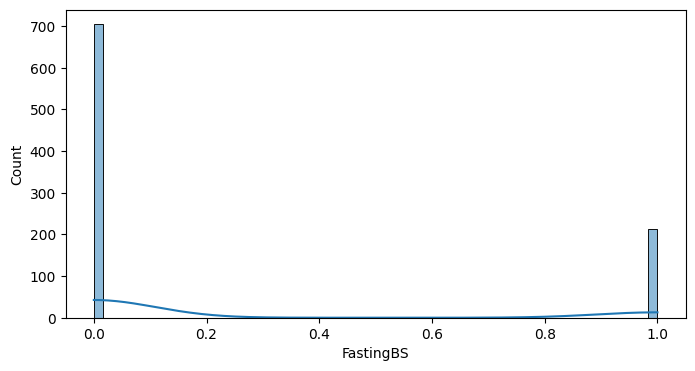

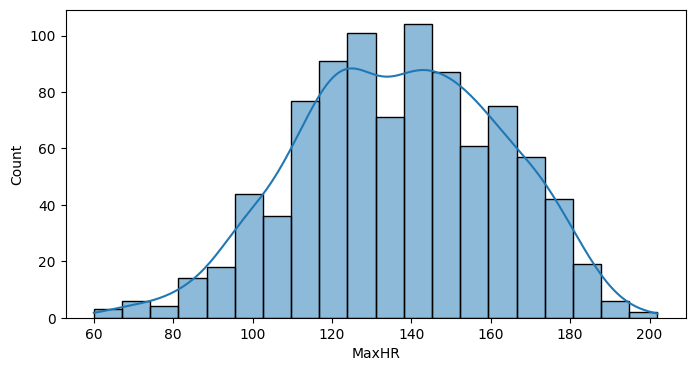

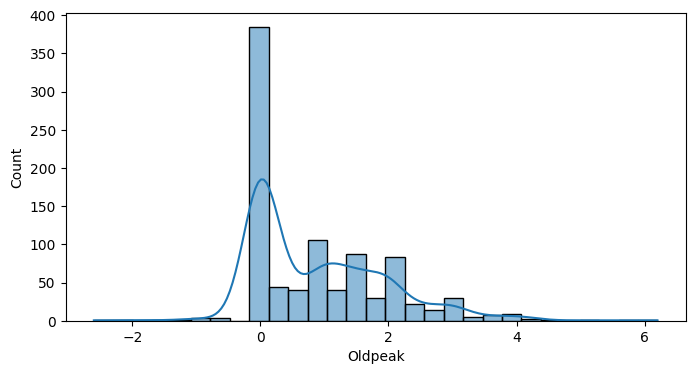

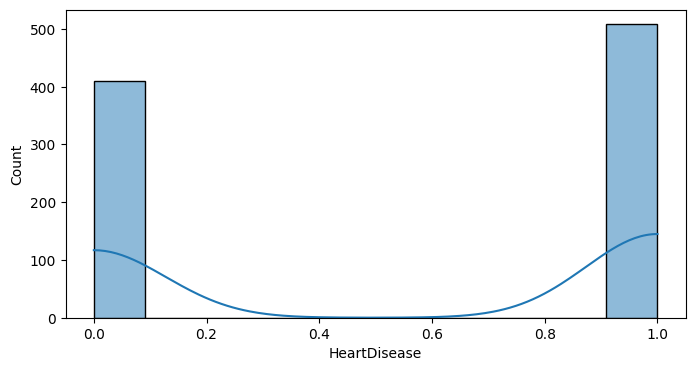

In [8]:
numerical_coloumn=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]
for col in numerical_coloumn:
        plt.figure(figsize=(8,4))
        sb.histplot(x=heart[col],kde=True)

In [9]:
mean=heart["Cholesterol"].replace(0,pd.NA).mean() # here i am using pd.NA so that pandas automatically ignore the NA values and calculates the mean of non null values
heart["Cholesterol"]=heart["Cholesterol"].replace(0,mean)

<Axes: xlabel='Cholesterol', ylabel='Count'>

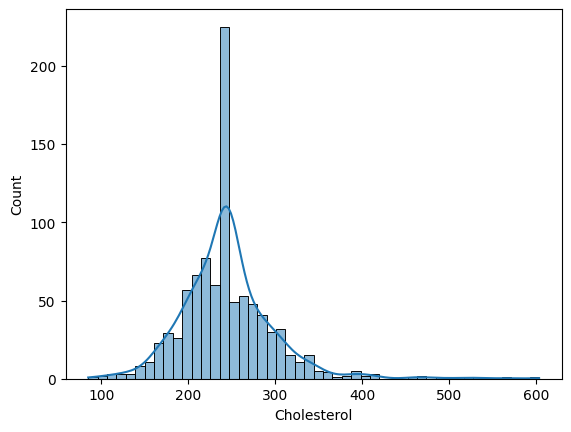

In [10]:
sb.histplot(x=heart["Cholesterol"],kde=True)

In [11]:
mean=heart["RestingBP"].replace(0,pd.NA).mean().__round__(0) # here i am using pd.NA so that pandas automatically ignore the NA values and calculates the mean of non null values
heart["RestingBP"]=heart["RestingBP"].replace(0,mean)
heart["RestingBP"].head()

0    140
1    160
2    130
3    138
4    150
Name: RestingBP, dtype: int64

In [12]:
heart.duplicated().sum()

np.int64(0)

In [13]:
heart["HeartDisease"].value_counts()            

HeartDisease
1    508
0    410
Name: count, dtype: int64

So our target variable is equally distributed

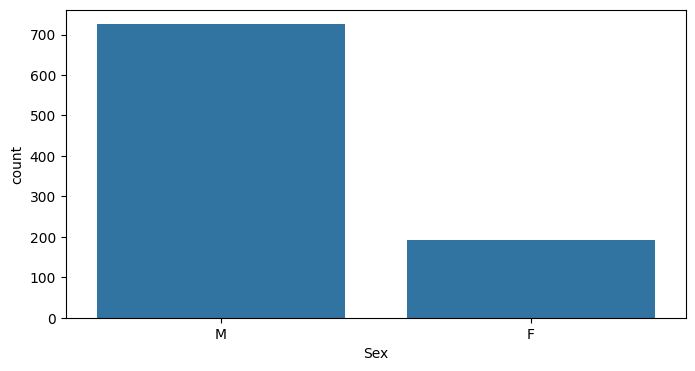

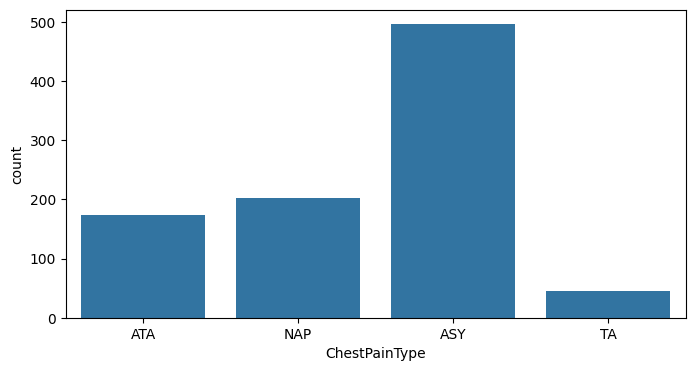

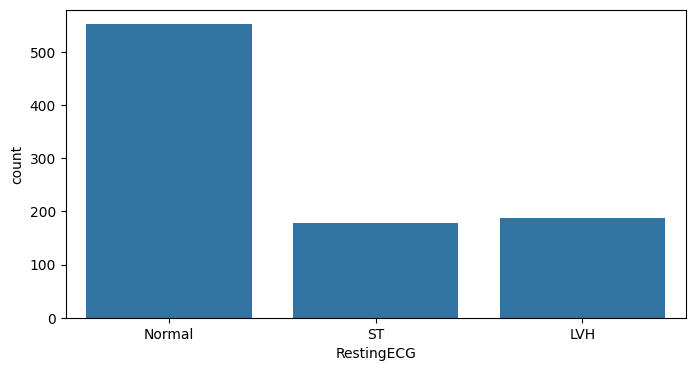

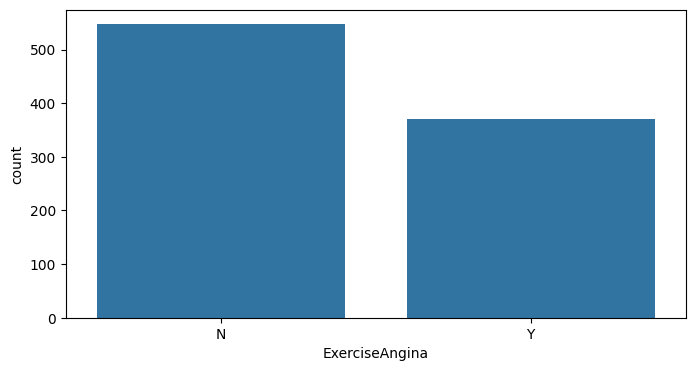

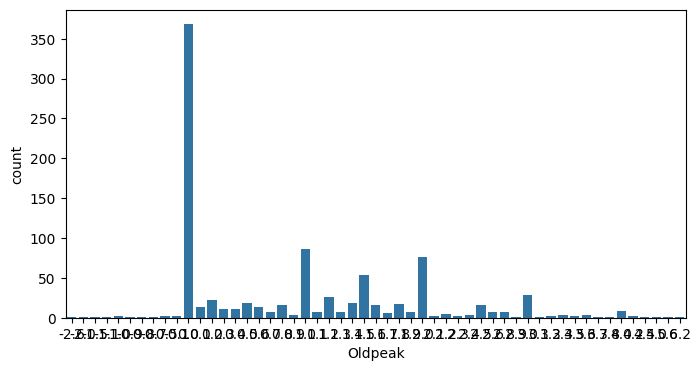

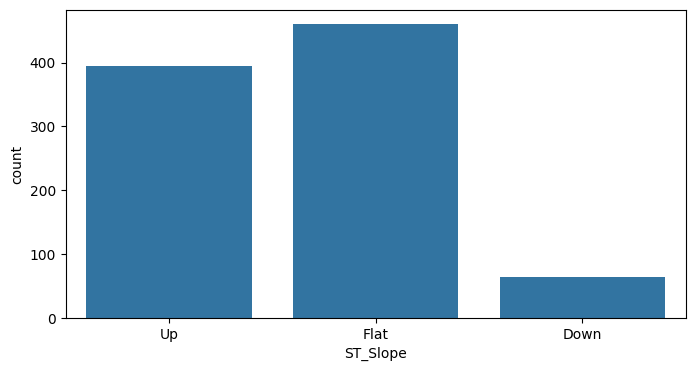

In [14]:
categorical_coloumn=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
for col in categorical_coloumn:
        plt.figure(figsize=(8,4))
        sb.countplot(x=heart[col])

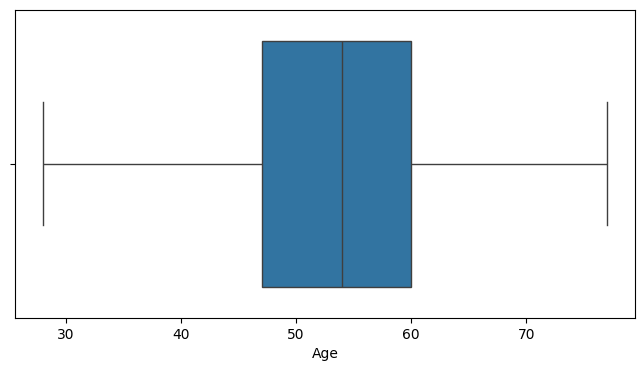

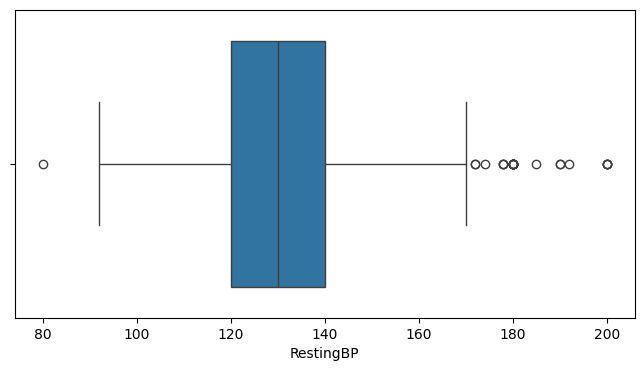

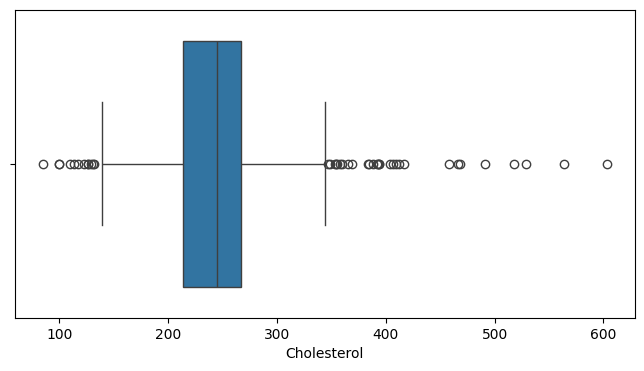

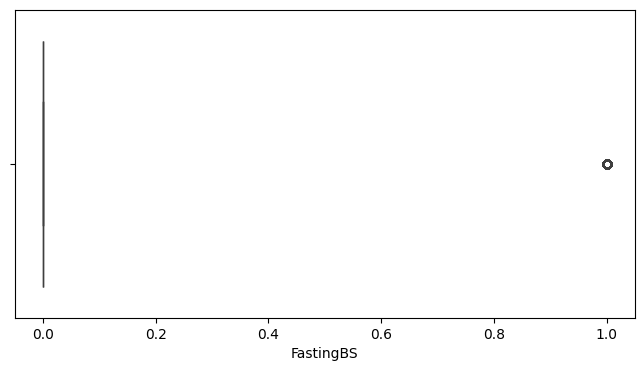

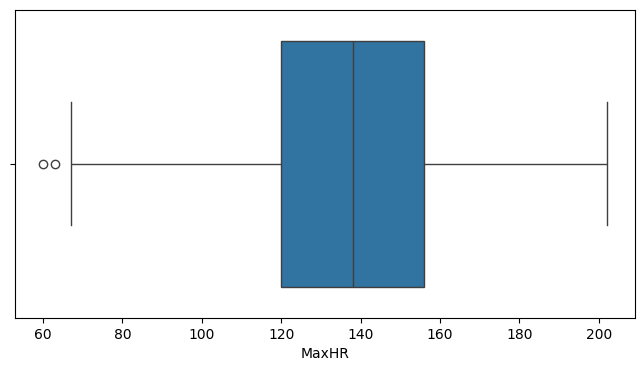

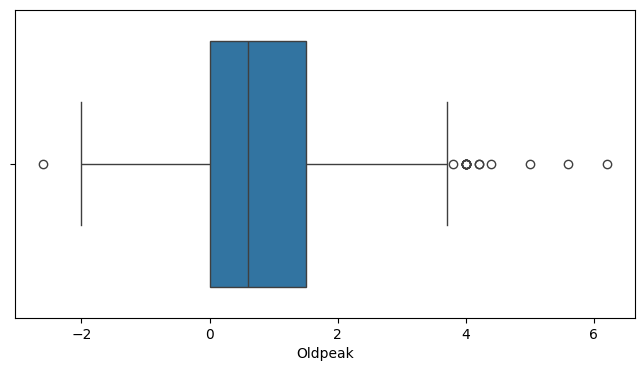

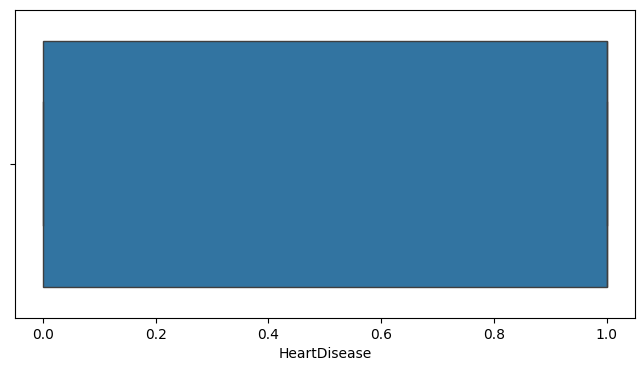

In [15]:
for col in numerical_coloumn:
        plt.figure(figsize=(8,4))
        sb.boxplot(x=heart[col])

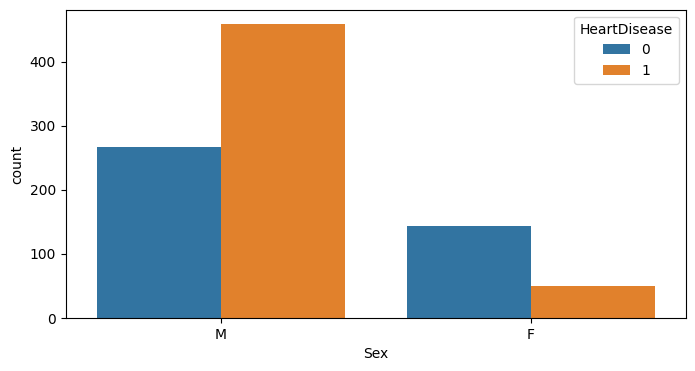

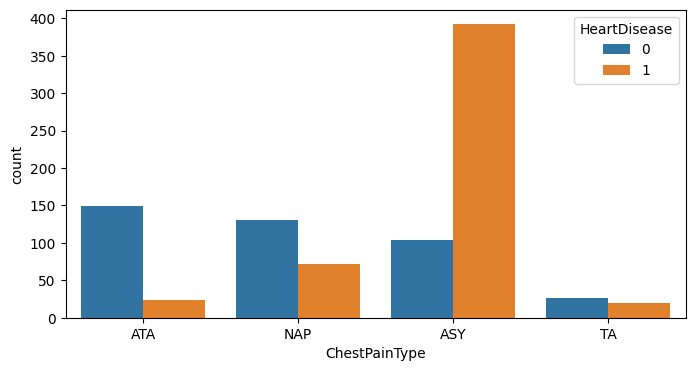

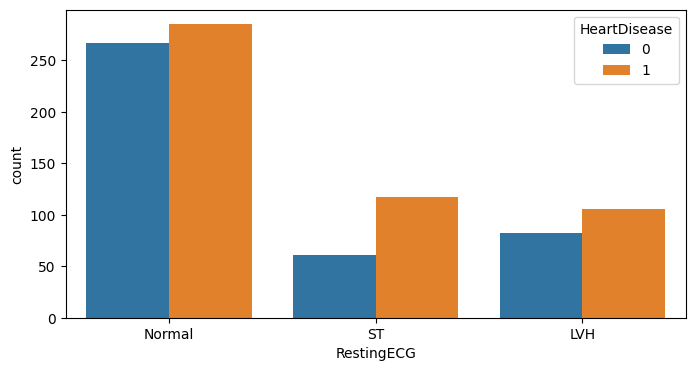

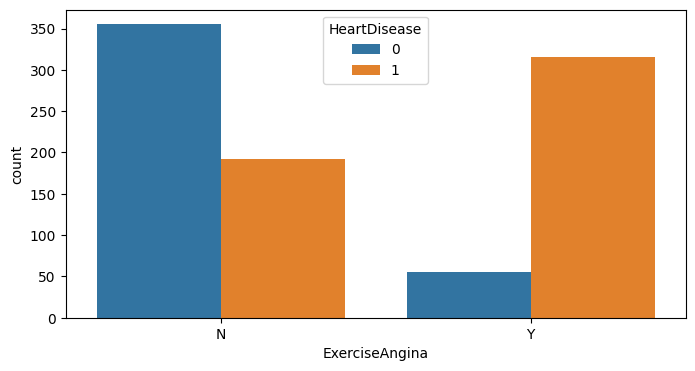

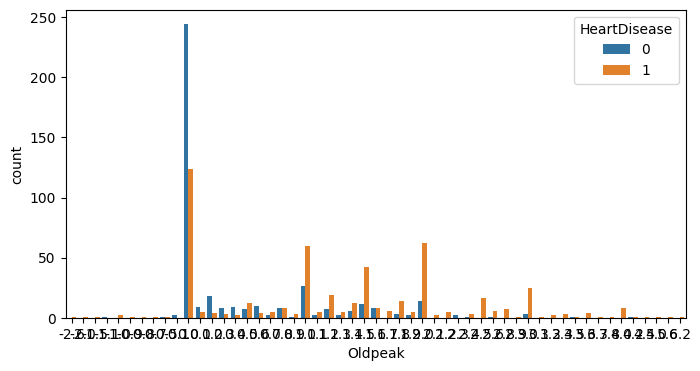

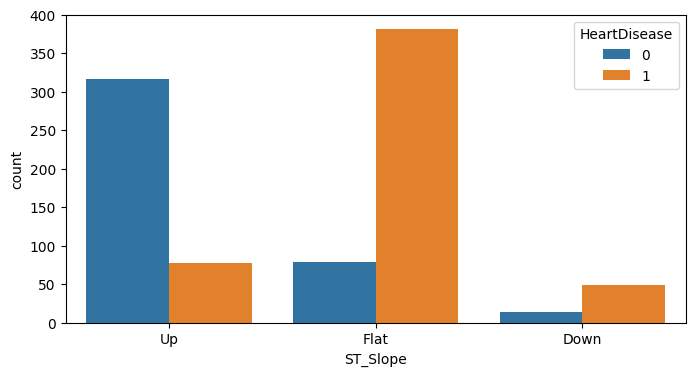

In [16]:
for col in categorical_coloumn:
        plt.figure(figsize=(8,4))
        sb.countplot(x=heart[col],hue=heart["HeartDisease"])

<Axes: >

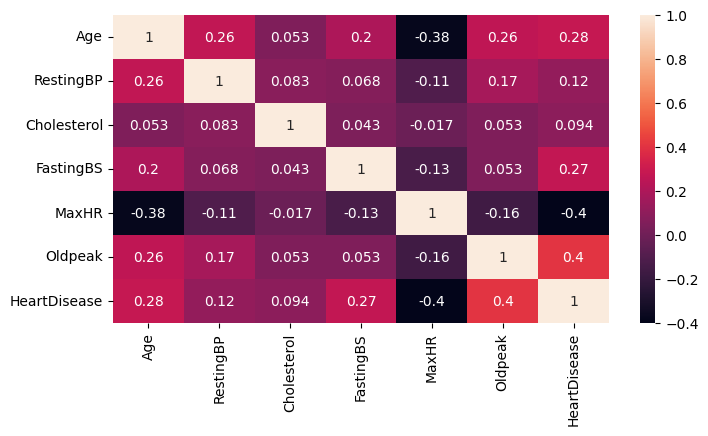

In [17]:
plt.figure(figsize=(8,4))
sb.heatmap(heart.corr(numeric_only=True),annot=True)

# Data Preprocessing

In [18]:
heart_cleaned=heart.copy()
heart_cleaned["Sex"]=heart_cleaned["Sex"].map({"M":1,"F":0})
heart_cleaned.rename(columns={"Sex":"isMale"},inplace=True)
heart_cleaned.dtypes

Age                 int64
isMale              int64
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [19]:
heart_cleaned.head()

,Age,isMale,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [20]:
heart_cleaned=pd.get_dummies(heart_cleaned,drop_first=True).astype(int)
heart_cleaned.head()

,Age,isMale,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0,0,0,1,0,1,0,0,0,1


In [21]:
heart_cleaned.dtypes

Age                  int64
isMale               int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
MaxHR                int64
Oldpeak              int64
HeartDisease         int64
ChestPainType_ATA    int64
ChestPainType_NAP    int64
ChestPainType_TA     int64
RestingECG_Normal    int64
RestingECG_ST        int64
ExerciseAngina_Y     int64
ST_Slope_Flat        int64
ST_Slope_Up          int64
dtype: object

# Feature Engineering

In [22]:
bins= [0, 200, 240, np.inf]
labels=["Desirable", "Borderline High", "High"]
heart_cleaned["Cholesterol_Level"]=pd.cut(heart_cleaned["Cholesterol"],bins=bins,labels=labels)
heart_cleaned=pd.get_dummies(heart_cleaned,columns=["Cholesterol_Level"],drop_first=True).astype(int)
heart_cleaned.head()

,Age,isMale,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Level_Borderline High,Cholesterol_Level_High
0,40,1,140,289,0,172,0,0,1,0,0,1,0,0,0,1,0,1
1,49,0,160,180,0,156,1,1,0,1,0,1,0,0,1,0,0,0
2,37,1,130,283,0,98,0,0,1,0,0,0,1,0,0,1,0,1
3,48,0,138,214,0,108,1,1,0,0,0,1,0,1,1,0,1,0
4,54,1,150,195,0,122,0,0,0,1,0,1,0,0,0,1,0,0


# Feature Scaling

Scaling the feature like Age, RestingBP, Cholesterol, MaxHR

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
big_col=["Age", "RestingBP", "Cholesterol", "MaxHR"]
heart_cleaned[big_col]=scaler.fit_transform(heart_cleaned[big_col])
heart_cleaned.head()

,Age,isMale,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Level_Borderline High,Cholesterol_Level_High
0,-1.433140,1,0.414825,0.834754,0,1.382928,0,0,1,0,0,1,0,0,0,1,0,1
1,-0.478484,0,1.527163,-1.210675,0,0.754157,1,1,0,1,0,1,0,0,1,0,0,0
2,-1.751359,1,-0.141345,0.722161,0,-1.525138,0,0,1,0,0,0,1,0,0,1,0,1
3,-0.584556,0,0.303591,-0.572651,0,-1.132156,1,1,0,0,0,1,0,1,1,0,1,0
4,0.051881,1,0.970994,-0.929194,0,-0.581981,0,0,0,1,0,1,0,0,0,1,0,0


# Checking the Correlation of all Feature with the HeartDisease(Target Feature)

In [24]:
from scipy.stats import pearsonr
input_feature=['Age', 'isMale', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Cholesterol_Level_Borderline High', 'Cholesterol_Level_High']


In [25]:
correlation_with_heartDisease={
        feature:pearsonr(heart_cleaned[feature],heart_cleaned["HeartDisease"])[0]
        for feature in input_feature
}
correlation_with_heartDisease

{'Age': np.float64(0.28203850581899725),
 'isMale': np.float64(0.30544491596314066),
 'RestingBP': np.float64(0.1179630169319873),
 'Cholesterol': np.float64(0.09258582507897906),
 'FastingBS': np.float64(0.26729118611029823),
 'MaxHR': np.float64(-0.40042076946319016),
 'Oldpeak': np.float64(0.39238540391984333),
 'ChestPainType_ATA': np.float64(-0.4019240529146675),
 'ChestPainType_NAP': np.float64(-0.21296362503940597),
 'ChestPainType_TA': np.float64(-0.05479026202691396),
 'RestingECG_Normal': np.float64(-0.09157996051345987),
 'RestingECG_ST': np.float64(0.10252722218986658),
 'ExerciseAngina_Y': np.float64(0.4942819918242687),
 'ST_Slope_Flat': np.float64(0.5541335908840072),
 'ST_Slope_Up': np.float64(-0.6221642083959947),
 'Cholesterol_Level_Borderline High': np.float64(-0.1362677217158271),
 'Cholesterol_Level_High': np.float64(0.22763440747210353)}

In [26]:
correlation=pd.DataFrame(list(correlation_with_heartDisease.items()),columns=["Feature","Correlation"])
correlation.sort_values(by="Correlation",ascending=False)
correlation

,Feature,Correlation
0,Age,0.282039
1,isMale,0.305445
2,RestingBP,0.117963
3,Cholesterol,0.092586
4,FastingBS,0.267291
5,MaxHR,-0.400421
6,Oldpeak,0.392385
7,ChestPainType_ATA,-0.401924
8,ChestPainType_NAP,-0.212964
9,ChestPainType_TA,-0.054790


<Axes: xlabel='count', ylabel='Age'>

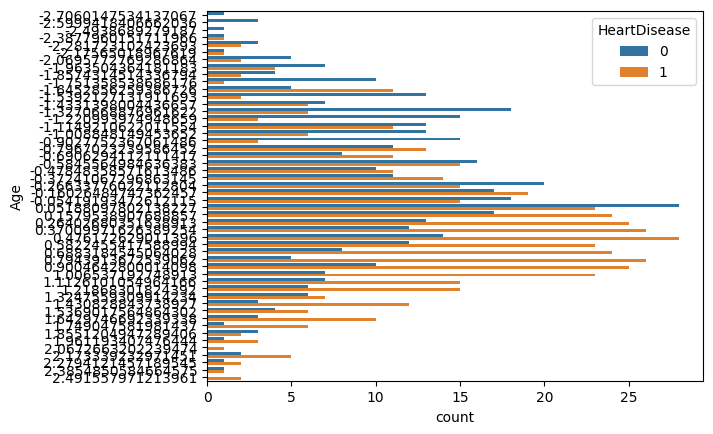

In [27]:
sb.countplot(y=heart_cleaned["Age"],hue=heart_cleaned["HeartDisease"])

Now we will finally perform the chai square test to identify what features we have to keep or what to drop by checking the p value if it less than alpha we will keep the feature and drop if it is greater than alpha

In [28]:
from scipy.stats import chi2_contingency as chaiSquare

First we have to make the HeartDisease Bins
But the bins are already made as 0 and 1
so we don't need to make bins like 


In [ ]:
# insurance_cleaned['charges_bin'] = pd.qcut(insurance_cleaned['charges'], q=4, labels=False)

In [33]:
alpha=0.05
chai_result={}
categorical_coloumn=["isMale","ChestPainType_ATA","ChestPainType_NAP","ChestPainType_TA","RestingECG_Normal","RestingECG_ST","ExerciseAngina_Y","ST_Slope_Flat","ST_Slope_Up","FastingBS"]
for cat in categorical_coloumn:
        frequency_frame=pd.crosstab(heart_cleaned[cat],heart_cleaned["HeartDisease"])
        chai_value,p_value,_,_=chaiSquare(frequency_frame)
        Decision= f"Keep the {cat} feature" if p_value <= alpha else f"Drop the {cat} feature"
        chai_result[cat]={
                "Chai Value":chai_value,
                "P Value":p_value,
                "Decision":Decision
                
        }
final_dataset_for_model_training=pd.DataFrame(chai_result).T
final_dataset_for_model_training     

,Chai Value,P Value,Decision
isMale,84.145101,0.0,Keep the isMale feature
ChestPainType_ATA,146.236323,0.0,Keep the ChestPainType_ATA feature
ChestPainType_NAP,40.608711,0.0,Keep the ChestPainType_NAP feature
ChestPainType_TA,2.273802,0.131577,Drop the ChestPainType_TA feature
RestingECG_Normal,7.327532,0.006791,Keep the RestingECG_Normal feature
RestingECG_ST,9.135266,0.002507,Keep the RestingECG_ST feature
ExerciseAngina_Y,222.259383,0.0,Keep the ExerciseAngina_Y feature
ST_Slope_Flat,279.659914,0.0,Keep the ST_Slope_Flat feature
ST_Slope_Up,352.823905,0.0,Keep the ST_Slope_Up feature
FastingBS,64.320679,0.0,Keep the FastingBS feature
